In [17]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
import numpy as np
from evaluation import score_model
from experiment import FeatureHandler, evaluate_model
from monroe_data import MonroeData, MonroeDataEntry, Color
from caption_featurizers import CaptionFeaturizer, EndingTokenizer
from color_featurizers import ColorFeaturizer, color_phi_fourier


In [ ]:
from models import CaptionEncoder, LiteralListener, ColorEncoder, CaptionGenerator, LiteralSpeaker


In [18]:
print("Loading training and dev data")
train_data = MonroeData("../data/csv/train_corpus_monroe.csv", "../data/entries/train_entries_monroe.pkl")
dev_data = MonroeData("../data/csv/dev_corpus_monroe.csv", "../data/entries/dev_entries_monroe.pkl")

print("Initializing featurizers")
caption_phi = CaptionFeaturizer(tokenizer=EndingTokenizer) # Use with parameter files that end in `endings_tkn`
# caption_phi = caption_featurizers.CaptionFeaturizer(tokenizer=caption_featurizers.WhitespaceTokenizer) # Use with parameter files don't
color_phi = ColorFeaturizer(color_phi_fourier, "rgb", normalized=True)
feature_handler = FeatureHandler(train_data, dev_data, caption_phi, color_phi) # target function is initialized by default

print("Obtaining training features") # get features even if you're runnning the pretrained model for example 
train_features = feature_handler.train_features()
train_targets = feature_handler.train_targets()

Loading training and dev data
Initializing featurizers
Obtaining training features


In [3]:
print("Initializing model")
# model parameters
embed_dim = 100; hidden_dim = 100; color_dim= 54;# hard coded for example - 54 comes from color fourier phi
model = LiteralListener(CaptionEncoder, num_epochs=5)
model.init_model(embed_dim = embed_dim, hidden_dim = hidden_dim, vocab_size = feature_handler.caption_featurizer.caption_indexer.size,
             color_dim = color_dim)

# to train: (probably takes about 15 min - 2 hrs) depending on # of epochs (5 - 30)
# print("Training model")
# model.fit(train_features, train_targets)
# model.save_model("model/literal_listener_5epoch-2.params")

print("Loading pretrained model")
# model.load_model("model/literal_listener_5epoch-2.params")
model.load_model("../model/literal_listener_5epoch_endings_tkn.params")

Initializing model
Loading pretrained model


In [30]:
print("Evaluating pretrained model")
# convert the model output to a score for that particular round
output_to_score = lambda model_outputs, targets: np.exp(model_outputs[np.arange(len(model_outputs)), targets]) # get the model's predicted probablity at each target index and use that as the score
evaluate_model(dev_data, feature_handler, model, output_to_score, score_model)

Evaluating pretrained model
(0.31542362027884807, 9.412617366605807e-09)
Accuracy: 0.8019783024888322


(0.31542362027884807, 9.412617366605807e-09)

In [209]:
train_features = feature_handler.train_features()
assess_features = feature_handler.test_features()

In [59]:
model.predict([assess_features[3]])

array([[-33.44099426,   0.        , -40.70819855]])

3) Game: 2641-2 Round: 4
the brighter blue


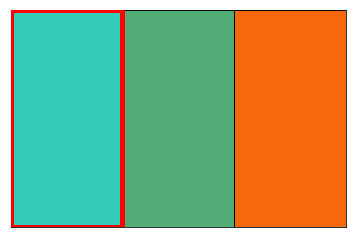

In [60]:
feature_handler.test_data.display_game(3)

In [61]:
feature_handler.test_color_permutations[3]

array([2, 0, 1])

In [56]:
model.predict([train_features[0]]) #sanity check

array([[ -1.97929764, -29.30341339,  -0.14869261]])

0) Game: 1124-1 Round: 1
The darker blue one


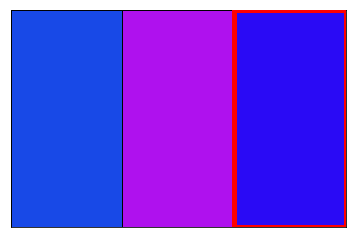

In [58]:
feature_handler.train_data.display_game(0)

In [37]:
import importlib
import example_experiments
importlib.reload(example_experiments)
import models
importlib.reload(models)

<module 'models' from '../models.py'>

In [129]:
from example_experiments import literal_listener_experiment, literal_speaker_experiment, load_data
from models import CaptionEncoder, ColorEncoder, CaptionGenerator, PytorchModel, LiteralListener, LiteralSpeaker

In [39]:
# a little cleaner
load_data(prefix=True)

In [130]:
ll_model = literal_listener_experiment(train=False, evaluate=False, model_file="../model/literal_listener_1epoch_endings_tkn.params")

Initializing featurizers
Obtaining training features
Initializing model
Loading pretrained model


In [106]:
ll_model.predict([feature_handler.train_features()[10]])

array([[-5.56033707e+00, -1.37165565e+01, -3.85665894e-03]])

10) Game: 1124-1 Round: 11
Purple


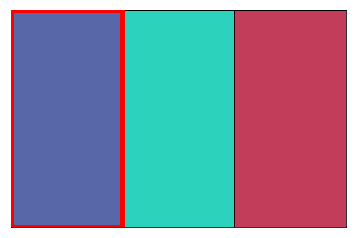

In [112]:
feature_handler.train_data.display_game(10)

In [111]:
feature_handler.train_color_permutations[10]

array([1, 2, 0])

In [313]:
ls_model_30 = literal_speaker_experiment(train=True, epochs=30, model_file="../model/literal_speaker_15epoch.params")

Initializing featurizers
Obtaining training features
Initializing model
Training model and saving to ../model/literal_speaker_15epoch.params:
---EPOCH 0---
0m 0s (0:0 0.00%) 0.0070
0m 14s (0:1000 6.38%) 3.0609
0m 30s (0:2000 12.77%) 3.0307
0m 46s (0:3000 19.15%) 3.1861
1m 3s (0:4000 25.53%) 2.9921
1m 21s (0:5000 31.92%) 3.3100
1m 40s (0:6000 38.30%) 2.8057
1m 57s (0:7000 44.69%) 2.4693
2m 16s (0:8000 51.07%) 2.8274
2m 35s (0:9000 57.45%) 2.2826
2m 55s (0:10000 63.84%) 2.3791
3m 15s (0:11000 70.22%) 2.1552
3m 33s (0:12000 76.60%) 2.1688
3m 54s (0:13000 82.99%) 2.4370
4m 13s (0:14000 89.37%) 2.4852
4m 32s (0:15000 95.75%) 2.8074
---EPOCH 1---
4m 45s (1:0 0.00%) 0.0014
5m 6s (1:1000 6.38%) 2.2147
5m 27s (1:2000 12.77%) 2.6383
5m 47s (1:3000 19.15%) 2.8268
6m 6s (1:4000 25.53%) 2.7929
6m 26s (1:5000 31.92%) 3.0407
6m 46s (1:6000 38.30%) 2.5745
7m 6s (1:7000 44.69%) 2.2975
7m 26s (1:8000 51.07%) 2.6873
7m 46s (1:9000 57.45%) 2.1520
8m 7s (1:10000 63.84%) 2.2035
8m 27s (1:11000 70.22%) 2.043

83m 20s (15:12000 76.60%) 2.0836
83m 44s (15:13000 82.99%) 2.3381
84m 7s (15:14000 89.37%) 2.3237
84m 31s (15:15000 95.75%) 2.6289
---EPOCH 16---
84m 47s (16:0 0.00%) 0.0017
85m 10s (16:1000 6.38%) 2.1591
85m 34s (16:2000 12.77%) 2.5201
85m 56s (16:3000 19.15%) 2.7474
86m 22s (16:4000 25.53%) 2.6889
86m 44s (16:5000 31.92%) 2.8848
87m 7s (16:6000 38.30%) 2.5384
87m 29s (16:7000 44.69%) 2.2324
87m 52s (16:8000 51.07%) 2.5351
88m 16s (16:9000 57.45%) 2.1147
88m 39s (16:10000 63.84%) 2.1457
89m 2s (16:11000 70.22%) 2.0553
89m 25s (16:12000 76.60%) 2.0278
89m 49s (16:13000 82.99%) 2.2737
90m 11s (16:14000 89.37%) 2.2878
90m 35s (16:15000 95.75%) 2.6224
---EPOCH 17---
90m 50s (17:0 0.00%) 0.0019
91m 13s (17:1000 6.38%) 2.1273
91m 38s (17:2000 12.77%) 2.4931
92m 0s (17:3000 19.15%) 2.7048
92m 25s (17:4000 25.53%) 2.6892
92m 48s (17:5000 31.92%) 2.8695
93m 13s (17:6000 38.30%) 2.5426
93m 35s (17:7000 44.69%) 2.2476
93m 58s (17:8000 51.07%) 2.6077
94m 21s (17:9000 57.45%) 2.1602
94m 44s (17:10

ls_model.predict([feature_handler.train_features()[10]])

In [ ]:
feature = feature_handler.train_features()[10]

In [ ]:
caption, colors = feature
caption = torch.tensor([caption], dtype=torch.long)

In [ ]:
caption[:, 0].view(-1,1)

In [33]:
isinstance(ColorEncoder, nn.Module)

False

In [8]:
import sys
sys.path.append("..")
import importlib
import models
importlib.reload(models)
from models import CaptionEncoder, ColorEncoder, CaptionGenerator, PytorchModel, LiteralListener, LiteralSpeaker
import example_experiments
importlib.reload(example_experiments)
from example_experiments import literal_speaker_experiment, load_data

In [33]:
load_data(prefix=True)
ls_model = literal_speaker_experiment(train=True, epochs=5, model_file="../model/literal_speaker_5epoch.params")

Initializing featurizers
Obtaining training features
Initializing model
Training model and saving to ../model/literal_speaker_5epoch.params:
---EPOCH 0---
0m 0s (0:0 0.00%) 0.0069
0m 13s (0:1000 6.38%) 3.0512
0m 28s (0:2000 12.77%) 3.0183
0m 45s (0:3000 19.15%) 3.1510
1m 2s (0:4000 25.53%) 3.0223
1m 20s (0:5000 31.92%) 3.2995
1m 38s (0:6000 38.30%) 2.7886
1m 55s (0:7000 44.69%) 2.4989
2m 14s (0:8000 51.07%) 2.8441
2m 31s (0:9000 57.45%) 2.2985
2m 52s (0:10000 63.84%) 2.3948
3m 10s (0:11000 70.22%) 2.2002
3m 28s (0:12000 76.60%) 2.2112
3m 46s (0:13000 82.99%) 2.4606
4m 4s (0:14000 89.37%) 2.5033
4m 21s (0:15000 95.75%) 2.8121
---EPOCH 1---
4m 33s (1:0 0.00%) 0.0014
4m 50s (1:1000 6.38%) 2.2571
5m 10s (1:2000 12.77%) 2.6407
5m 29s (1:3000 19.15%) 2.8201
5m 48s (1:4000 25.53%) 2.8319
6m 7s (1:5000 31.92%) 3.0947
6m 28s (1:6000 38.30%) 2.5896
6m 47s (1:7000 44.69%) 2.2589
7m 8s (1:8000 51.07%) 2.6789
7m 27s (1:9000 57.45%) 2.1300
7m 48s (1:10000 63.84%) 2.2363
8m 6s (1:11000 70.22%) 2.0744

In [30]:
train_features = feature_handler.train_features()

In [340]:
output = ls_model_30.predict([train_features[350]])

In [341]:
output[0][0]

array([  0,  19,   5,  10,   5,  11,  13,   5, 400,   1, 116,  13,   4,
         5, 331, 145,   1, 116,   3,   5,  10])

In [342]:
[feature_handler.caption_featurizer.caption_indexer.get_word_from_idx(i) for i in output[0][0]]

['<sos>',
 'red',
 'one',
 '~',
 'one',
 'lime',
 'green',
 'one',
 'oh',
 'the',
 'magenta',
 'green',
 'blue',
 'one',
 'ligh',
 'idea',
 'the',
 'magenta',
 '+er',
 'one',
 '~']

350) Game: 3540-a Round: 3
orange


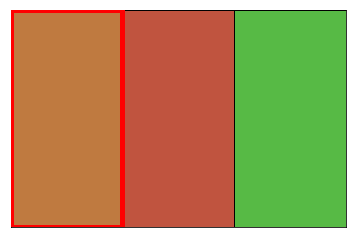

In [343]:
feature_handler.train_data.display_game(350)

In [32]:
train_features[10]

[array([0, 7, 6]), array([[ 1.00000000e+00, -4.71396744e-01, -5.55570245e-01,
          3.02005947e-01, -9.83105481e-01,  6.24859512e-01,
         -8.17584813e-01, -1.22410677e-01,  9.32992816e-01,
          4.71396744e-01, -1.00000000e+00,  4.71396744e-01,
         -6.98376238e-01, -3.02005947e-01,  9.83105481e-01,
         -8.93224299e-01,  8.17584813e-01,  1.22410677e-01,
         -5.55570245e-01, -4.71396744e-01,  1.00000000e+00,
         -9.60430503e-01,  6.98376238e-01,  3.02005947e-01,
         -2.45412290e-02,  8.93224299e-01, -8.17584813e-01,
          0.00000000e+00, -8.81921291e-01,  8.31469595e-01,
         -9.53306019e-01,  1.83039889e-01,  7.80737221e-01,
         -5.75808167e-01,  9.92479563e-01, -3.59895051e-01,
         -8.81921291e-01, -1.22464685e-16,  8.81921291e-01,
         -7.15730846e-01,  9.53306019e-01, -1.83039889e-01,
          4.49611336e-01,  5.75808167e-01, -9.92479563e-01,
         -8.31469595e-01,  8.81921291e-01,  0.00000000e+00,
          2.78519690e-

In [265]:
ls_model_5 = literal_speaker_experiment(train=True, epochs=5, model_file="../model/literal_speaker_5epoch.params")

Initializing featurizers
Obtaining training features
Initializing model
Training model and saving to ../model/literal_speaker_5epoch.params:
---EPOCH 0---
0m 0s (0:0 0.00%) 0.0069
0m 11s (0:1000 6.38%) 3.0524
0m 23s (0:2000 12.77%) 3.0276
0m 35s (0:3000 19.15%) 3.1625
0m 47s (0:4000 25.53%) 3.0144
0m 59s (0:5000 31.92%) 3.2938
1m 13s (0:6000 38.30%) 2.7465
1m 27s (0:7000 44.69%) 2.4579
1m 41s (0:8000 51.07%) 2.8212
1m 55s (0:9000 57.45%) 2.2524
2m 8s (0:10000 63.84%) 2.3933
2m 22s (0:11000 70.22%) 2.1675
2m 36s (0:12000 76.60%) 2.2027
2m 50s (0:13000 82.99%) 2.4322
3m 4s (0:14000 89.37%) 2.4420
3m 18s (0:15000 95.75%) 2.8065
---EPOCH 1---
3m 28s (1:0 0.00%) 0.0014
3m 42s (1:1000 6.38%) 2.2375
3m 57s (1:2000 12.77%) 2.6681
4m 11s (1:3000 19.15%) 2.8382
4m 27s (1:4000 25.53%) 2.7684
4m 41s (1:5000 31.92%) 3.1047
4m 55s (1:6000 38.30%) 2.5592
5m 10s (1:7000 44.69%) 2.2681
5m 24s (1:8000 51.07%) 2.6497
5m 39s (1:9000 57.45%) 2.1373
5m 55s (1:10000 63.84%) 2.2319
6m 9s (1:11000 70.22%) 2.04

In [307]:
output = ls_model_5.predict([train_features[500]])

In [308]:
[feature_handler.caption_featurizer.caption_indexer.get_word_from_idx(i) for i in output[0][0]]

['<sos>',
 'green',
 'one',
 'mustard',
 'blue',
 'one',
 'red',
 'one',
 'the',
 'blue',
 'one',
 'made',
 'one',
 'the',
 'blue',
 'one',
 'made',
 'one',
 'the',
 'blue',
 'one']

200) Game: 7131-3 Round: 3
lime green


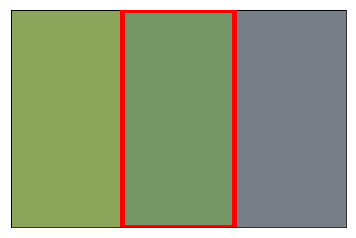

In [309]:
feature_handler.train_data.display_game(200)

In [91]:
feature_handler.caption_featurizer.caption_indexer.get_word_from_idx(6)

'<eos>'

In [111]:
ct = 0
for d in train_data:
    if d.caption.endswith("one"):
        ct += 1
print(ct/len(train_data))

0.041557612511969357


In [125]:
feature_handler.caption_featurizer.caption_indexer.get_idx_from_word("<eos>")

6

In [131]:
ll_model = literal_listener_experiment(train=False, evaluate=False, model_file="../model/literal_listener_5epoch_endings_tkn.params")

Initializing featurizers
Obtaining training features
Initializing model
Loading pretrained model


In [226]:
def predict_display_one(data, features, permutations, model, i, overwrite_caption=None):
    data.display_game(i)
    feature = features[i]
    if overwrite_caption != None:
        feature[0] = feature_handler.caption_featurizer.to_string_features(overwrite_caption)[1]
    probs = np.exp(model.predict([features[i]]))[0][permutations[i]]
    print(probs)

120) Game: 2007-2 Round: 23
blue gray


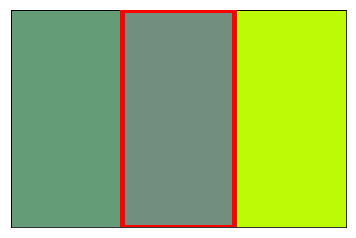

[0.91941406 0.0042554  0.07633118]


In [261]:
predict_display_one(train_data, train_features, feature_handler.test_color_permutations, ll_model, 120,
                   overwrite_caption="purple")

In [262]:
feature_handler.train_data[0]

The darker blue one

In [263]:
feature_handler.caption_featurizer.caption_indexer.idx2word

{0: '<sos>',
 1: 'the',
 2: 'dark',
 3: '+er',
 4: 'blue',
 5: 'one',
 6: '<eos>',
 7: 'purple',
 8: 'medium',
 9: 'pink',
 10: '~',
 11: 'lime',
 12: '<unk>',
 13: 'green',
 14: '.',
 15: 'mud',
 16: 'brown',
 17: 'camo',
 18: '+ish',
 19: 'red',
 20: 'grey',
 21: '+est',
 22: 'shade',
 23: 'of',
 24: ',',
 25: 'for',
 26: 'ones',
 27: 'light',
 28: 'shaded',
 29: 'more',
 30: '...',
 31: 'not',
 32: 'plain',
 33: 'yellow',
 34: 'orang',
 35: 'lol',
 36: 'like',
 37: 'that',
 38: 'description',
 39: '?',
 40: 'haha',
 41: 'thank',
 42: 'you',
 43: 'neon',
 44: 'i',
 45: 'think',
 46: 'they',
 47: "'re",
 48: 'both',
 49: 'a',
 50: 'bit',
 51: "'s",
 52: 'orange',
 53: 'or',
 54: 'classic',
 55: 'weird',
 56: 'too',
 57: 'this',
 58: 'is',
 59: 'and',
 60: 'lavend',
 61: 'yucky',
 62: '!',
 63: 'select',
 64: 'bright',
 65: 'olive',
 66: ';',
 67: '(',
 68: 'doing',
 69: 'great',
 70: ')',
 71: 'teal',
 72: 'two',
 73: 'are',
 74: 'redd',
 75: 'good',
 76: 'job',
 77: 'on',
 78: 'last'